# Basic Sterio Matching



In [132]:
#import os
import re
import scipy.signal
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def get_patch(image, x, y, patch_half_width):
    return image[y-patch_half_width:y+patch_half_width+1,
                 x-patch_half_width:x+patch_half_width+1]

def compute_match_score_ssd(patch_a, patch_b):
    ssd_temp = patch_a-patch_b
    ssd = -np.sum(ssd_temp**2)
    return ssd

def compute_match_score_ncc(patch_a, patch_b):
    ncc = (np.sum((patch_a-np.mean(patch_a)) * (patch_b-np.mean(patch_b))))/(np.sqrt(np.sum((patch_a-np.mean(patch_a))**2))*np.sqrt(np.sum((patch_b-np.mean(patch_b))**2)))
    return ncc

def patch_match_stereo(image_a, image_b, x_a, y_a,
                       match_score_fn,
                       patch_half_width):
    """Returns the location of a feature/patch between stereo images.
    Inputs are the x, y coordinates of the patch in image_a.
    Outputs are the x, y coordinates of the patch in image_b."""

    patch_a = get_patch(image_a, x_a, y_a, 
                        patch_half_width)
    
    possible_coordinates_X = np.arange(patch_half_width, image_b.shape[1]-patch_half_width)
    y_b = y_a

    response = np.zeros((len(possible_coordinates_X)))
    for ind, x_b in enumerate(possible_coordinates_X):
        # Get the patch
        patch_b = get_patch(image_b, x_b, y_b,
                            patch_half_width=patch_half_width)

        response[ind] = match_score_fn(patch_a, patch_b)
    ind = np.argmax(response)
    x_b = possible_coordinates_X[ind]
    y_b = y_a

    return x_b, y_b, response[ind]





  0%|          | 0/5 [00:00<?, ?it/s]

Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28/35
Progress: 29/35
Progress: 30/35
Progress: 31/35
Progress: 32/35
Progress: 33/35
Progress: 34/35
Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28





 20%|██        | 1/5 [01:34<06:16, 94.24s/it]

Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28/35
Progress: 29/35
Progress: 30/35
Progress: 31/35
Progress: 32/35
Progress: 33/35
Progress: 34/35
Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28





 40%|████      | 2/5 [03:11<04:45, 95.23s/it]

Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28/35
Progress: 29/35
Progress: 30/35
Progress: 31/35
Progress: 32/35
Progress: 33/35
Progress: 34/35
Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28





 60%|██████    | 3/5 [04:50<03:12, 96.34s/it]

Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28/35
Progress: 29/35
Progress: 30/35
Progress: 31/35
Progress: 32/35
Progress: 33/35
Progress: 34/35
Progress: 0/35
Progress: 1/35
Progress: 2/35
Progress: 3/35
Progress: 4/35
Progress: 5/35
Progress: 6/35
Progress: 7/35
Progress: 8/35
Progress: 9/35
Progress: 10/35
Progress: 11/35
Progress: 12/35
Progress: 13/35
Progress: 14/35
Progress: 15/35
Progress: 16/35
Progress: 17/35
Progress: 18/35
Progress: 19/35
Progress: 20/35
Progress: 21/35
Progress: 22/35
Progress: 23/35
Progress: 24/35
Progress: 25/35
Progress: 26/35
Progress: 27/35
Progress: 28





 80%|████████  | 4/5 [06:40<01:40, 100.46s/it]

Progress: 0/30
Progress: 1/30
Progress: 2/30
Progress: 3/30
Progress: 4/30
Progress: 5/30
Progress: 6/30
Progress: 7/30
Progress: 8/30
Progress: 9/30
Progress: 10/30
Progress: 11/30
Progress: 12/30
Progress: 13/30
Progress: 14/30
Progress: 15/30
Progress: 16/30
Progress: 17/30
Progress: 18/30
Progress: 19/30
Progress: 20/30
Progress: 21/30
Progress: 22/30
Progress: 23/30
Progress: 24/30
Progress: 25/30
Progress: 26/30
Progress: 27/30
Progress: 28/30
Progress: 29/30
Progress: 0/30
Progress: 1/30
Progress: 2/30
Progress: 3/30
Progress: 4/30
Progress: 5/30
Progress: 6/30
Progress: 7/30
Progress: 8/30
Progress: 9/30
Progress: 10/30
Progress: 11/30
Progress: 12/30
Progress: 13/30
Progress: 14/30
Progress: 15/30
Progress: 16/30
Progress: 17/30
Progress: 18/30
Progress: 19/30
Progress: 20/30
Progress: 21/30
Progress: 22/30
Progress: 23/30
Progress: 24/30
Progress: 25/30
Progress: 26/30
Progress: 27/30
Progress: 28/30
Progress: 29/30






100%|██████████| 5/5 [07:36<00:00, 91.25s/it] 


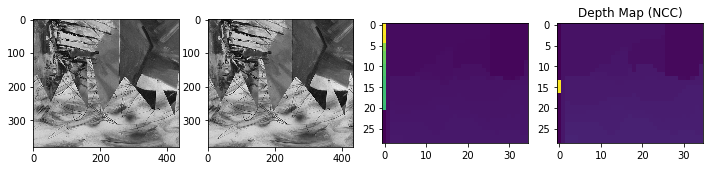

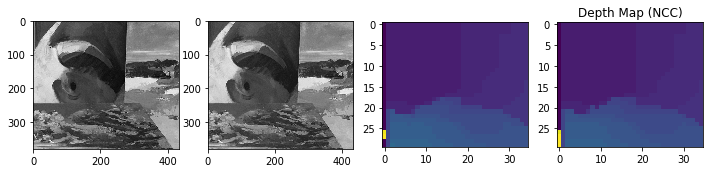

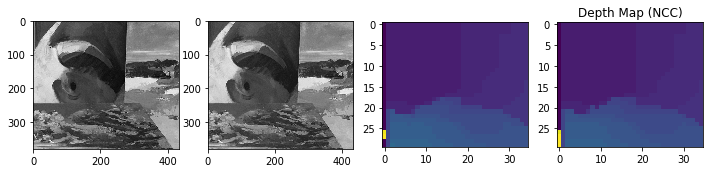

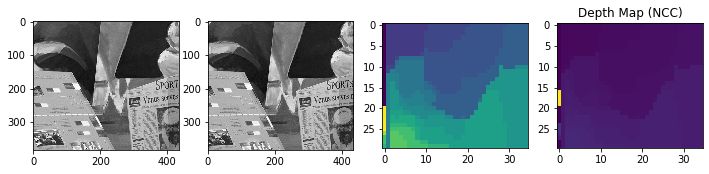

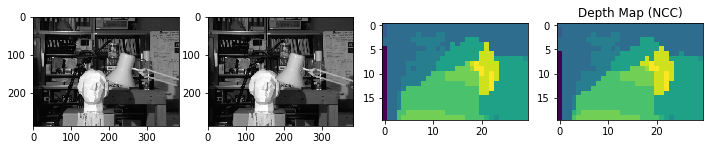

In [133]:
# Compute and plot the depth maps
phw = 45
spacing = 10

Data_path = "/Users/negar/Downloads/Dataset"

temp =[]

def compute_depth_map(image_a, image_b, match_score_fn):
    xs = range(phw, image_b.shape[1]-phw, spacing)
    ys = range(phw, image_b.shape[0]-phw, spacing)
    disparity_mat = np.zeros((len(ys), len(xs)))
    responses_mat = np.zeros((len(ys), len(xs)))
    for xi, x_a in enumerate(xs):
        print(f"Progress: {xi}/{len(xs)}")
        for yi, y_a in enumerate(ys):
            x_b, y_b, response = patch_match_stereo(
                image_a, image_b, x_a, y_a, match_score_fn, patch_half_width=phw)
            dx = x_a - x_b
            dy = y_a - y_b
            disparity_mat[yi, xi] = np.sqrt(dx**2 + dy**2)
            responses_mat[yi, xi] = response
            
    # Compute and threshold the depth map
    temp.append(disparity_mat)
    depth = 1/(disparity_mat.copy() + 1e-5)
    depth[depth > 0.01] = 0.01
    return disparity_mat
# Load the images

def load_image_gray(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    img = np.asarray(img).astype(np.float)/255
    if len(img.shape) > 2:
        return img[:, :, 0]
    else:
        return img



for folders in tqdm(os.listdir(Data_path)):
    if(folders != ".DS_Store"):
        for filename in os.listdir(Data_path+"/"+folders):
            if (filename[0:5]=="view1"):
                
                image_a = load_image_gray(Data_path+"/"+folders+'/'+filename)
                
                
            elif (filename[0:5]=="view5"):
    
                image_b = load_image_gray(Data_path+"/"+folders+'/'+filename)
            
            
    ## Plotting Code
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image_a, cmap='gray')
    plt.subplot(1, 4, 2)
    plt.imshow(image_b, cmap='gray')    


    out = compute_depth_map(image_a, image_b, compute_match_score_ssd)
#     print(len(out))
    plt.subplot(1, 4, 3)
    plt.imshow(out)
#     plt.title('Depth Map (SSD)')
    plt.subplot(1, 4, 4)
    plt.imshow(compute_depth_map(image_a, image_b, compute_match_score_ncc))
    plt.title('Depth Map (NCC)')

10


# Using the Belief Propagation 


In [27]:
import numpy as np
import scipy.ndimage
import imageio
import matplotlib.pyplot as plt
from numpy.linalg import norm
from tqdm import tqdm

### Data Cost
The data cost is the cost of assigning a label L to a pixel (y,x). The label can be any value between 0 to 15.

The output would be a 3 dimensional array which the height is y, the width one is x, and the depth is the data cost of label L. The data cost is calculated through the following formula :

$$D_p(f_p) = min(||I_l(y,x) − I_r(y,x − f_p)||,τ)$$

Where τ denotes a truncation value. The truncation is necessary to make the data cost robust to occlusion and artifacts that violate the brightness constancy assumption. 

In [28]:

def data_cost(I_l, I_r, t ,dispMargin):
    
    hight = I_l.shape[0]
    width = I_l.shape[1]
    
    D=np.zeros((hight,width,dispMargin))
    print(D.shape)


    for lable in range(dispMargin):
        
#         D[:,lable:width,lable]=np.minimum(np.linalg.norm(I_l[:,lable:width]-I_r[:,0:width-lable],ord=1,axis=2)
#                                           ,t*np.ones((hight,width-lable)))
#         D[:,0:lable,lable]=np.minimum(np.linalg.norm(I_l[:,0:lable]-I_r[:,width-lable:width],ord=1,axis=2)
#                                       ,t*np.ones((hight,lable))) 
        

      D[:, :, lable] = np.minimum(1./3*norm(I_l - np.roll(I_r, lable, axis=1), axis=2, ord=1), 
                                           t*np.ones((hight, width)))
#     print(D.shape)


    return D


### Energy function

The quality of a labeling is given by an energy function. I more detailes, rho is the set of pixels in an image I. The labeling function f assign lable to pixels. The lables would be in a range that I have mentioned in Data Cost section. Also, the lables of the pixels which are naighbors would be similar else there are near an edge, in this case the cost would be assing using V (fp,fq).
The energy is as follow :

$$E(f) = \Sigma_{(p,q)\in N} V (f_p,f_q) + 􏰂\Sigma_{p \in \rho} D_p(f_p)$$

Where N is the edges.

Therefore, the inputs of energy function are :

    Data Cost : D
    Lambda : scalar, lamb
    Disparity : the matix of disparity of all the pixels, disp

In [29]:
def energy_f(disp,D,lamb):
    
    
    hight = D.shape[0]
    width = D.shape[1]

    yy,xx = np.meshgrid(range(hight),range(width),indexing='ij')
    
    pix_cost = D[yy,xx, disp]
#     print("pix_cost:", pix_cost)
    en = np.sum(pix_cost)
#     print("en:", en)

    cost_r = (disp - np.roll(disp, -1, axis=1) != 0)*lamb
    cost_l = (disp - np.roll(disp, 1, axis=1) != 0)*lamb
    cost_u = (disp - np.roll(disp, 1, axis=0) != 0)*lamb
    cost_d = (disp - np.roll(disp, -1, axis=0) != 0)*lamb

    cost_r[:, -1] = 0
    cost_l[:, 0] = 0
    cost_u[0, :] = 0
    cost_d[-1, :] = 0
    
    en += np.sum(cost_r + cost_l + cost_u + cost_d)
#     print("en:", en)

    return en

## Update Massages

In this section The massages of each nodes are updated based on the privious massages of naighbor nods. The updates are done based on the folloing formula:

$$m_{p q}^{t}\left(f_{q}\right)=\min _{f_{p}}\left(V\left(f_{p}, f_{q}\right)+D_{p}\left(f_{p}\right)+\sum_{s \in \mathcal{N}(p) \backslash q} m_{s p}^{t-1}\left(f_{p}\right)\right)$$

Therefore the input of the function would be:

    The 3D arrayes of the privious massages(right, left, up and down)
    The data cost

Also, I have normalized the messages between each iteration, otherwise overflow/ underflow likely to occur after enough message updates.In other word, if the itteration times increase, you would probably get a black picture withought it.

In practice one usually normalizes the messages to sum to 1, so that :

$$\Sigma_{x,j} M_{i,j}(x_j) = 1 $$



In [30]:
def incoming(mU_pre,mD_pre,mL_pre,mR_pre):
    
    #The incoming massages are computed here in such a way that:
    #incoming msg from left pixel = outgoing message from pixel right roll of 1 pix to left
    
    mL_com = np.roll(mR_pre, 1, axis=1)
    mR_com = np.roll(mL_pre, -1, axis=1)
    mU_com = np.roll(mD_pre, 1, axis=0)
    mD_com = np.roll(mU_pre, -1, axis=0)
    
    return mU_com, mD_com, mL_com, mR_com 


def updateMsg(mL_pre,mR_pre,mU_pre,mD_pre,D,lamb):
    
    hight = D.shape[0]
    width = D.shape[1]

    mL_new = mU_new = mD_new = mR_new = np.zeros(D.shape)
    
    #The incoming massages are computed here
    mU_com, mD_com, mL_com, mR_com = incoming(mU_pre,mD_pre,mL_pre,mR_pre)
    
    #Msg form boundaries not computed
    mL_com[:,width-1,:]=0
    mR_com[:,0,:]=0
    mU_com[hight-1,:,:]=0
    mD_com[0,:,:]=0
    
    #comput the sum expect for the q, first I comput all then subtract q!
    All = D + mL_com + mR_com + mU_com + mD_com
    
    mU_out = All - mU_com
    mL_out = All - mL_com
    mD_out = All - mD_com
    mR_out = All - mR_com
    
    sU = np.amin(mU_out, axis=2)
    sL = np.amin(mL_out, axis=2)
    sD = np.amin(mD_out, axis=2)
    sR = np.amin(mR_out, axis=2)

    for lable in range(disparityMargin):
        mU_new[:, :, lable] = np.minimum(mU_out[:, :, lable], lamb + sU)
        mL_new[:, :, lable] = np.minimum(mL_out[:, :, lable], lamb + sL)
        mD_new[:, :, lable] = np.minimum(mD_out[:, :, lable], lamb + sD)
        mR_new[:, :, lable] = np.minimum(mR_out[:, :, lable], lamb + sR)

    return mU_new,mD_new,mL_new,mR_new

def normalize(msg):
    m=np.mean(msg,axis=2)
    msg -= m[:,:,np.newaxis]
    return msg
    

### Compute beleif

Ater T iterations a belief vector is computed for each node wich is the sum of the data cost and massages from all the naighbors. It will be computed as follow :

$$ b_{q}(f_{q})=D_{p}\left(f_{p}\right)+\sum_{p \in \mathcal{N}(q)} m_{pq}^{T}(f_{p})$$

Finally, the label $f_q^∗$ that minimizes the beleif individually at each node is selected.



In [31]:
def belief_f(mL_pre, mR_pre, mU_pre, mD_pre, D):
    
    
    msgIncome = incoming(mU_pre,mD_pre,mL_pre,mR_pre)

    belief = D + np.sum(msgIncome, axis=0)

    return belief


### MAP labling

In this section I am just returning the lables for each pixle which is a best label from beliefs computed so far.

In [32]:
def MAP(belief):
    return np.argmin(belief, axis=2)

## Calculate sterio

In this part I have impelimented all the components and I'm just going to calculate disparity and energy.






  0%|          | 0/2 [00:00<?, ?it/s]

(1110, 1390, 16)








  0%|          | 0/20 [00:00<?, ?it/s]





  5%|▌         | 1/20 [00:07<02:26,  7.73s/it]





 10%|█         | 2/20 [00:13<02:05,  7.00s/it]





 15%|█▌        | 3/20 [00:18<01:49,  6.46s/it]





 20%|██        | 4/20 [00:23<01:38,  6.13s/it]





 25%|██▌       | 5/20 [00:29<01:29,  5.93s/it]





 30%|███       | 6/20 [00:34<01:23,  5.93s/it]





 35%|███▌      | 7/20 [00:40<01:14,  5.76s/it]





 40%|████      | 8/20 [00:45<01:07,  5.63s/it]





 45%|████▌     | 9/20 [00:50<01:00,  5.54s/it]





 50%|█████     | 10/20 [00:56<00:55,  5.50s/it]





 55%|█████▌    | 11/20 [01:02<00:49,  5.53s/it]





 60%|██████    | 12/20 [01:07<00:44,  5.51s/it]





 65%|██████▌   | 13/20 [01:13<00:39,  5.59s/it]





 70%|███████   | 14/20 [01:19<00:34,  5.75s/it]





 75%|███████▌  | 15/20 [01:24<00:27,  5.54s/it]





 80%|████████  | 16/20 [01:29<00:21,  5.29s/it]





 85%|████████▌ | 17/20 [01:34<00:15,  5.17s/it]





 90%|█████████ | 18/20 [01:38<00:09,  4.98s/it]





 95%|

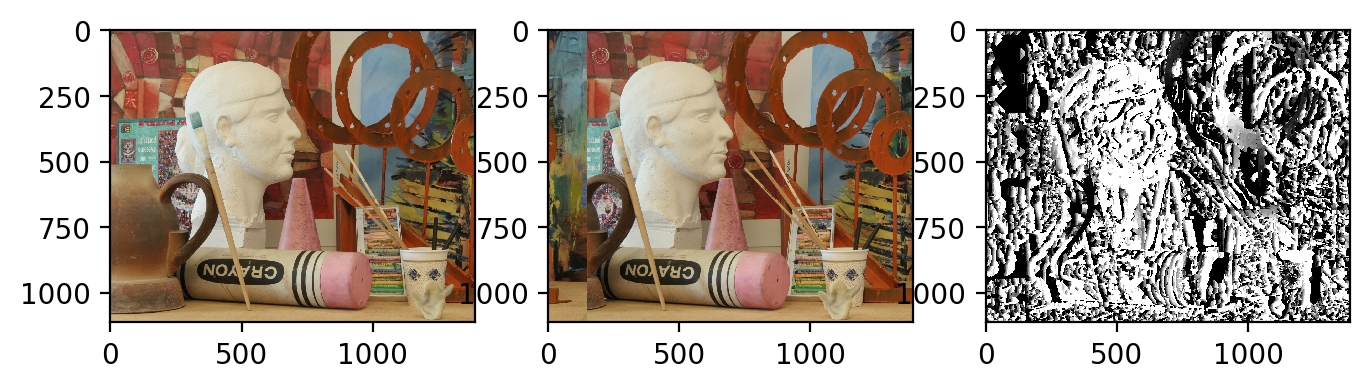

<Figure size 432x288 with 0 Axes>

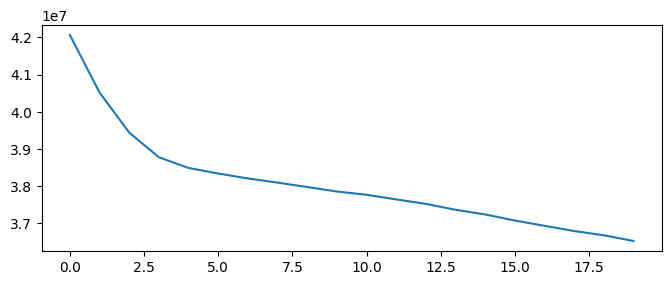






 50%|█████     | 1/2 [01:52<01:52, 112.71s/it]

(1110, 1390, 16)








  0%|          | 0/20 [00:00<?, ?it/s]





  5%|▌         | 1/20 [00:05<01:49,  5.79s/it]





 10%|█         | 2/20 [00:11<01:42,  5.67s/it]





 15%|█▌        | 3/20 [00:16<01:34,  5.56s/it]





 20%|██        | 4/20 [00:21<01:27,  5.48s/it]





 25%|██▌       | 5/20 [00:26<01:20,  5.35s/it]





 30%|███       | 6/20 [00:32<01:18,  5.58s/it]





 35%|███▌      | 7/20 [00:37<01:09,  5.35s/it]





 40%|████      | 8/20 [00:42<01:02,  5.19s/it]





 45%|████▌     | 9/20 [00:47<00:55,  5.04s/it]





 50%|█████     | 10/20 [00:53<00:53,  5.38s/it]





 55%|█████▌    | 11/20 [01:02<00:58,  6.52s/it]





 60%|██████    | 12/20 [01:09<00:52,  6.54s/it]





 65%|██████▌   | 13/20 [01:16<00:46,  6.63s/it]





 70%|███████   | 14/20 [01:21<00:37,  6.18s/it]





 75%|███████▌  | 15/20 [01:26<00:29,  5.87s/it]





 80%|████████  | 16/20 [01:31<00:22,  5.65s/it]





 85%|████████▌ | 17/20 [01:36<00:16,  5.49s/it]





 90%|█████████ | 18/20 [01:41<00:10,  5.36s/it]





 95%|

<Figure size 432x288 with 0 Axes>

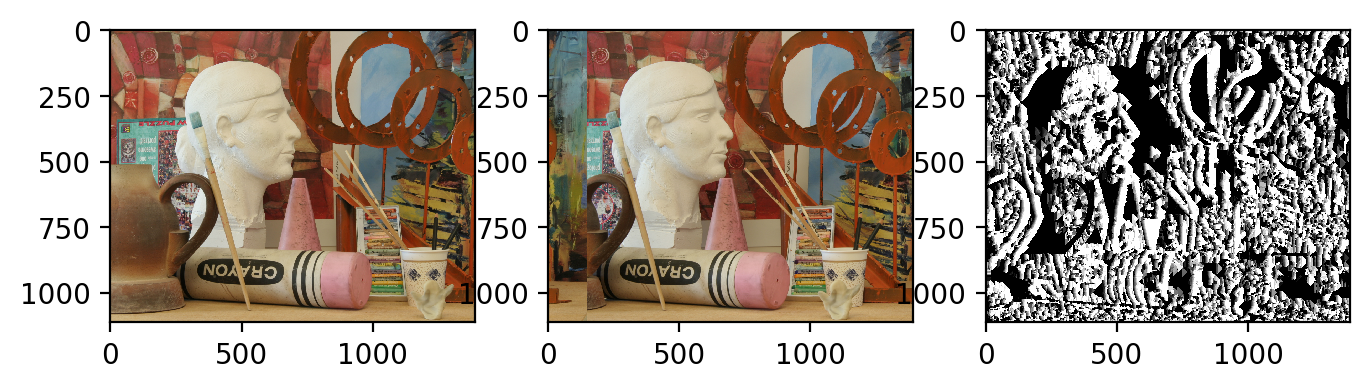

<Figure size 432x288 with 0 Axes>

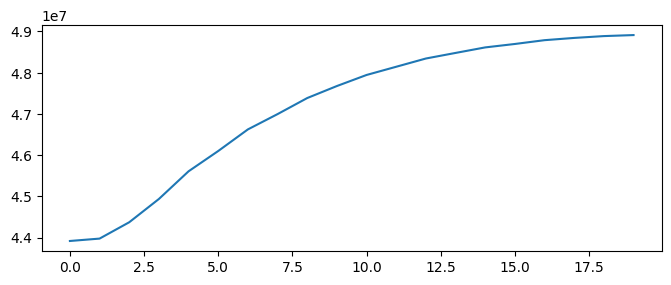






100%|██████████| 2/2 [03:48<00:00, 114.27s/it]


<Figure size 432x288 with 0 Axes>

In [177]:
# def stereo_bp(I_l, I_r, dispMargin, lamb, t=15, iterations=60):
    
# Parameters
disparityMargin=num_disp_values=16 # these images have disparity between 0 and 15.
lamb=10.0
iterations=20
t=20

im_l = imageio.imread('art_view0.png')
im_r = imageio.imread('art_view5.png')
im_r = np.roll(im_r, 150, axis=1)
im_2 = imageio.imread('art_view5.png')
# Gaussian filtering
imgL = scipy.ndimage.filters.gaussian_filter(im_l.astype(float), 0.6)
imgR = scipy.ndimage.filters.gaussian_filter(im_r.astype(float), 0.6)

im_list = [[imgL,imgR],[imgL,im_2]]
# name_list = ["im"]
j=0
for I_l,I_r in tqdm(im_list):
    
#     print(I_l,I_r)
    hight = I_l.shape[0]
    width = I_l.shape[1]
    
    # storing energy at each iteration to later visualize it
    energy = np.zeros((iterations))
    mU = mD = mL = mR = np.zeros((hight, width, disparityMargin))
    
    D = data_cost(I_l, I_r, t, disparityMargin)
    
    for i in tqdm(range(iterations)):
        
        mU, mD, mL, mR = updateMsg(mL, mR, mU, mD, D, lamb)
        mU = normalize(mU)
        mD = normalize(mD)
        mL = normalize(mL)         
        mR = normalize(mR)
        
        
    # Next lines unused for next iteration, could be done only at the end
        belief = belief_f(mL, mR, mU, mD, D)
        disparity = MAP(belief)
        energy[i] = energy_f(disparity,D,lamb)
            
            
    imageio.imwrite('disparity_{:g}.png'.format(lamb),disparity)
    # Plot results
    plt.figure(figsize=(8,3), dpi=200)
    plt.subplot(131)
    plt.imshow(im_l)
    plt.subplot(132)
    plt.imshow(im_r)
    plt.subplot(133)
    plt.imshow(disparity,cmap='gray',vmin=0,vmax=num_disp_values-1)
    plt.show()
    plt.savefig("imgs_{}.pdf".format(j),bbox_inches='tight',pad_inches=0)
    plt.figure(figsize=(8,3), dpi=100)
    plt.subplot(111)
    plt.plot(energy)
    plt.show()
    plt.savefig("energy{}.pdf".format(j),bbox_inches='tight',pad_inches=0)
    j = j+1








  0%|          | 0/5 [00:00<?, ?it/s]

Sawtooth (380, 434, 3) (380, 434, 3)
(380, 434, 16)


Lossy conversion from int64 to uint8. Range [0, 15]. Convert image to uint8 prior to saving to suppress this warning.


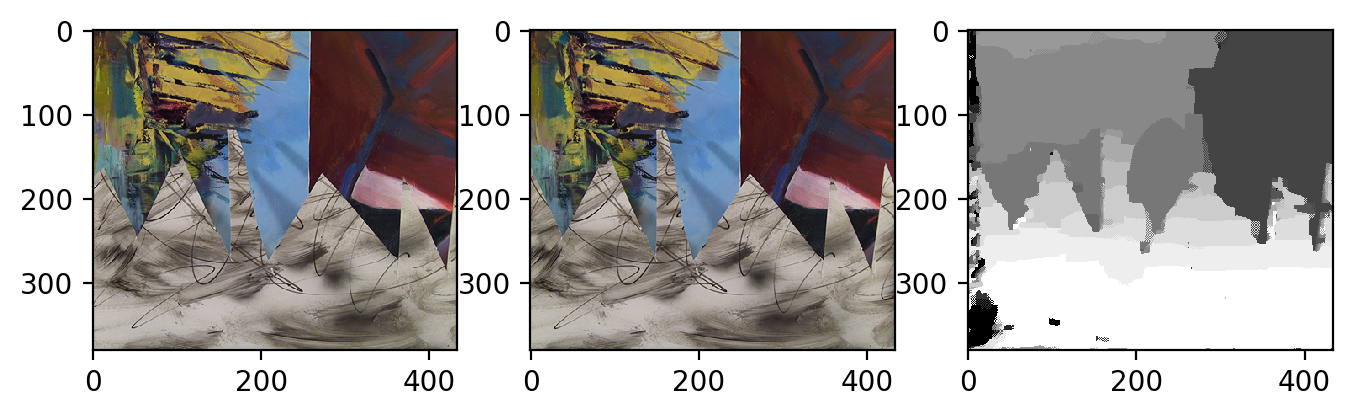

<Figure size 432x288 with 0 Axes>

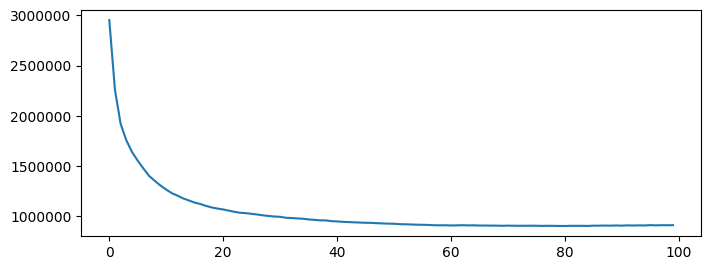






 20%|██        | 1/5 [00:43<02:52, 43.09s/it]

Bull (381, 433, 3) (381, 433, 3)
(381, 433, 16)


Lossy conversion from int64 to uint8. Range [0, 15]. Convert image to uint8 prior to saving to suppress this warning.


<Figure size 432x288 with 0 Axes>

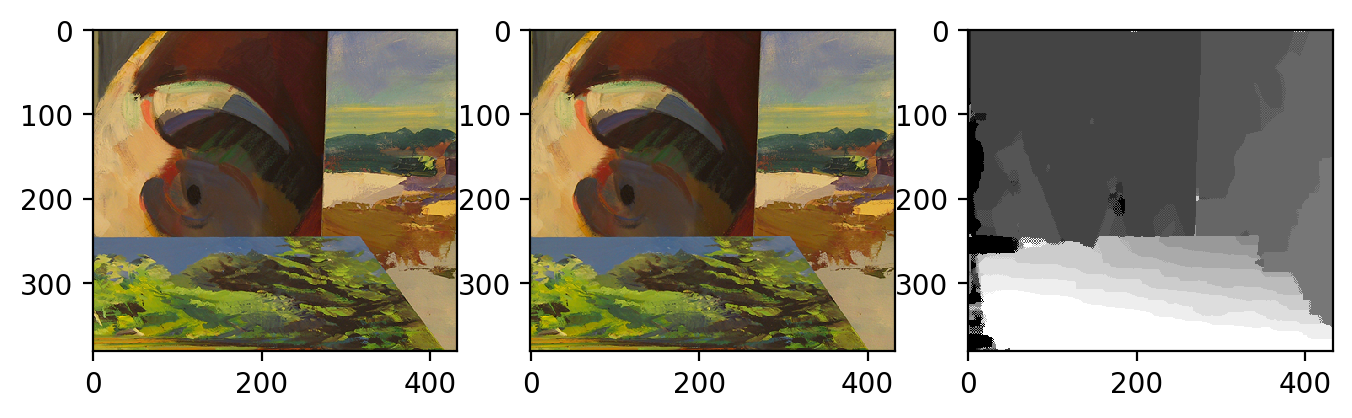

<Figure size 432x288 with 0 Axes>

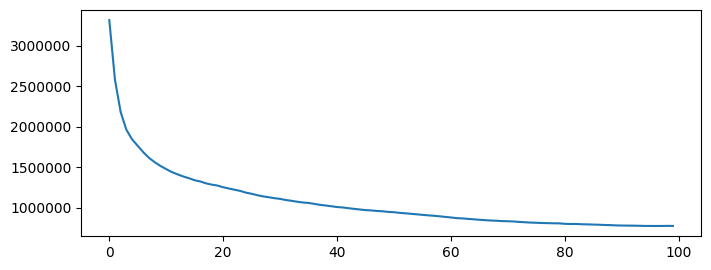






 40%|████      | 2/5 [01:25<02:08, 42.92s/it]

Venus (383, 434, 3) (383, 434, 3)
(383, 434, 16)


Lossy conversion from int64 to uint8. Range [0, 15]. Convert image to uint8 prior to saving to suppress this warning.


<Figure size 432x288 with 0 Axes>

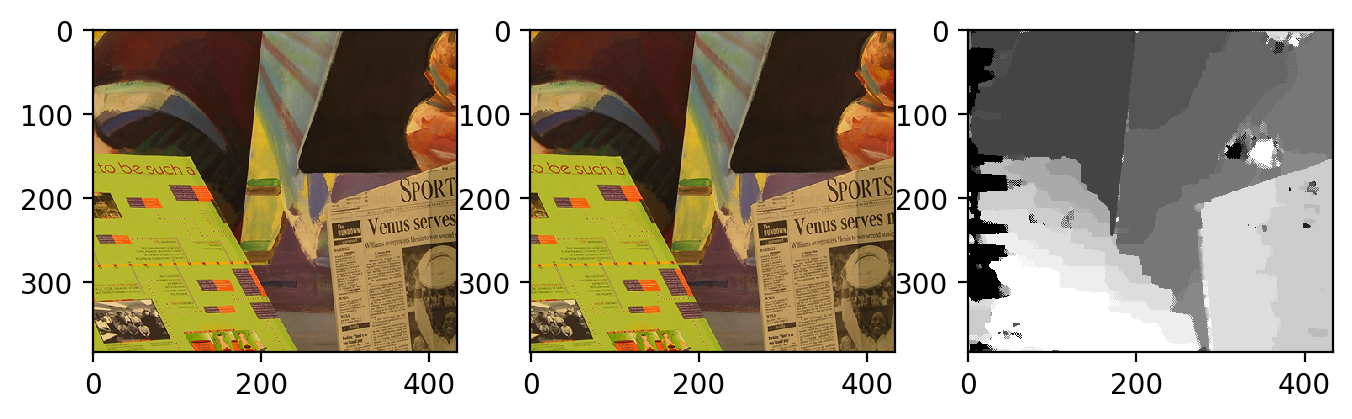

<Figure size 432x288 with 0 Axes>

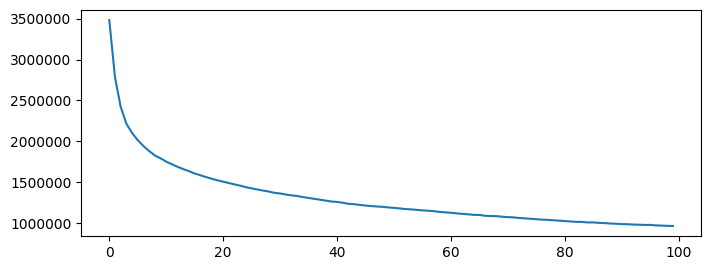






 80%|████████  | 4/5 [02:09<00:36, 36.68s/it]

img (288, 384, 3) (288, 384, 3)
(288, 384, 16)


Lossy conversion from int64 to uint8. Range [0, 15]. Convert image to uint8 prior to saving to suppress this warning.


<Figure size 432x288 with 0 Axes>

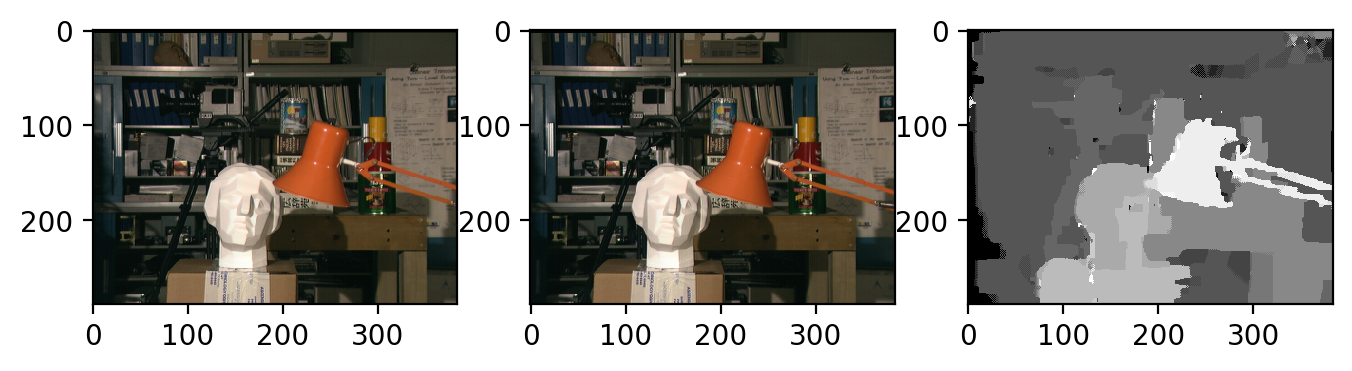

<Figure size 432x288 with 0 Axes>

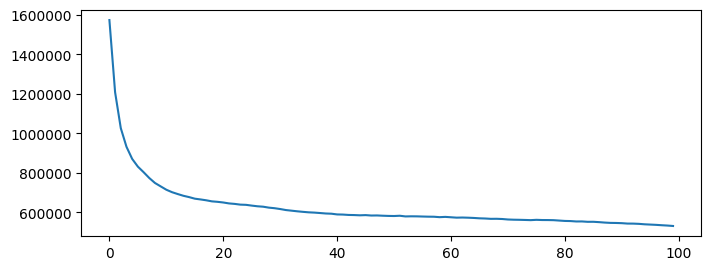






100%|██████████| 5/5 [02:39<00:00, 31.94s/it]


<Figure size 432x288 with 0 Axes>

In [176]:
disparityMargin=16 # these images have disparity between 0 and 15.
lamb=10.0
iterations=100
t=15
MSE_list_algo =[]
MSE_list_iter =[]


import os

Data_path = "/Users/negar/Downloads/Dataset"

for folders in tqdm(os.listdir(Data_path)):
    if(folders != ".DS_Store"):
        for filename in os.listdir(Data_path+"/"+folders):
            if (filename[0:5]=="view1"):
                
                im_l = imageio.imread(Data_path+"/"+folders+'/'+filename)
                
                
            elif (filename[0:5]=="view5"):
    
                im_r = imageio.imread(Data_path+"/"+folders+'/'+filename)

        # Gaussian filtering
        I_l = scipy.ndimage.filters.gaussian_filter(im_l.astype(float), 0.6)
        I_r = scipy.ndimage.filters.gaussian_filter(im_r.astype(float), 0.6)
        print(folders , I_l.shape,I_r.shape)

        hight = I_l.shape[0]
        width = I_l.shape[1]

        # storing energy at each iteration to later visualize it
        energy = np.zeros((iterations))
        mU = mD = mL = mR = np.zeros((hight, width, disparityMargin))

        D = data_cost(I_l, I_r, t, disparityMargin)
        MSE_sublist_iter =[]
        for i in range(iterations):

            mU, mD, mL, mR = updateMsg(mL, mR, mU, mD, D, lamb)
            mU = normalize(mU)
            mD = normalize(mD)
            mL = normalize(mL)         
            mR = normalize(mR)


        # Next lines unused for next iteration, could be done only at the end
            belief = belief_f(mL, mR, mU, mD, D)
            disparity = MAP(belief)
            energy[i] = energy_f(disparity,D,lamb)
            depth = 1/(disparity.copy() + 1e-5)
            depth[depth > 0.01] = 0.01
            if (i%5 == 0):
                MSE_sublist_iter.append(disparity)
                
        MSE_list_iter.append(MSE_sublist_iter)       
        MSE_list_algo.append(disparity)   
        
        imageio.imwrite('disparity_{:g}.png'.format(lamb),disparity)
        # Plot results
        plt.figure(figsize=(8,3), dpi=200)
        plt.subplot(131)
        plt.imshow(im_l)
        plt.subplot(132)
        plt.imshow(im_r)
        plt.subplot(133)
        plt.imshow(disparity,cmap='gray',vmin=0,vmax=disparityMargin-1)
        plt.show()
        plt.savefig("disparity{}.pdf".format(filename),bbox_inches='tight',pad_inches=0)
        plt.figure(figsize=(8,3), dpi=100)
        plt.subplot(111)
        plt.plot(energy)
        plt.show()
        plt.savefig("energy{}.pdf".format(filename),bbox_inches='tight',pad_inches=0)
        j = j+1

            #    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
            #       # do your stuff

# OpenCV Stereo



  0%|          | 0/5 [00:00<?, ?it/s]

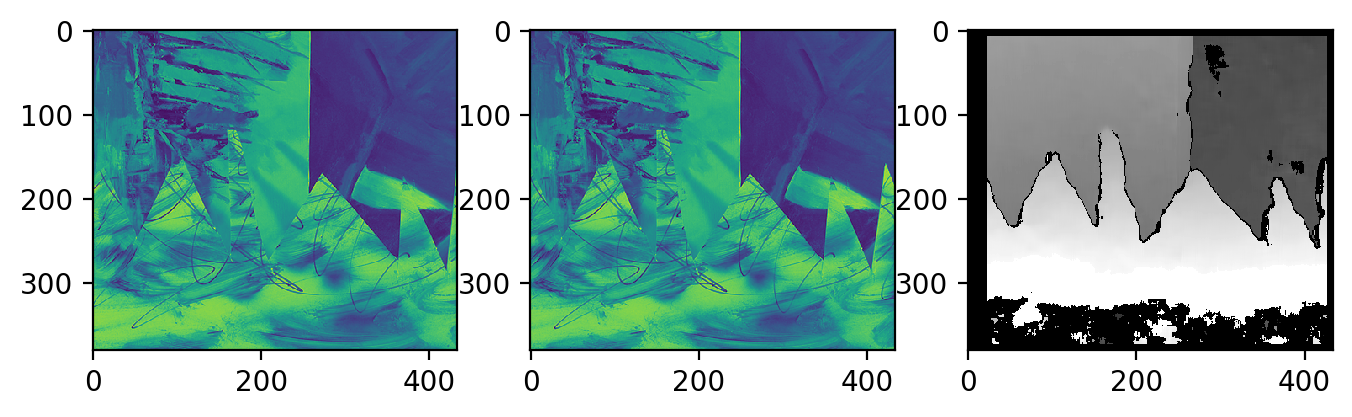



 20%|██        | 1/5 [00:00<00:03,  1.09it/s]

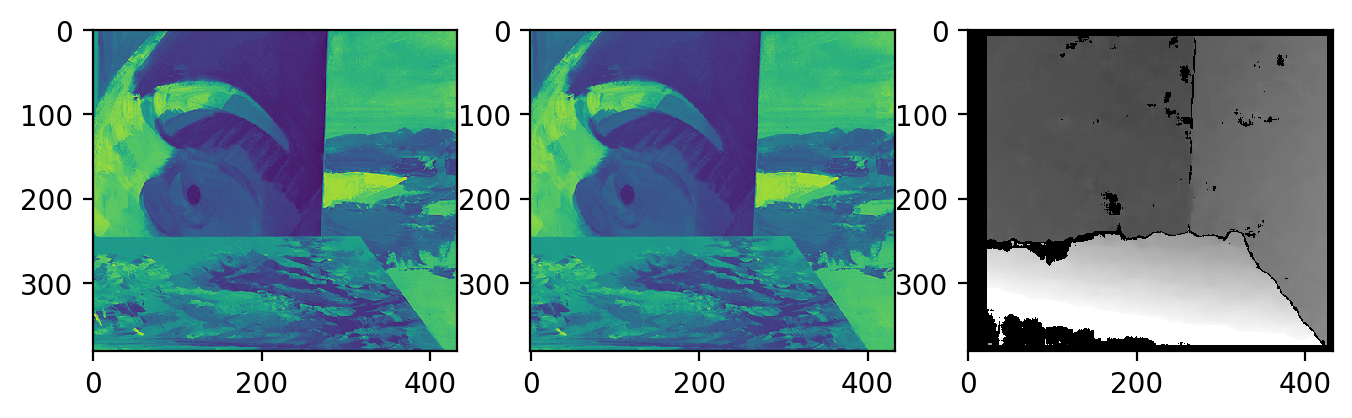



 40%|████      | 2/5 [00:02<00:02,  1.01it/s]

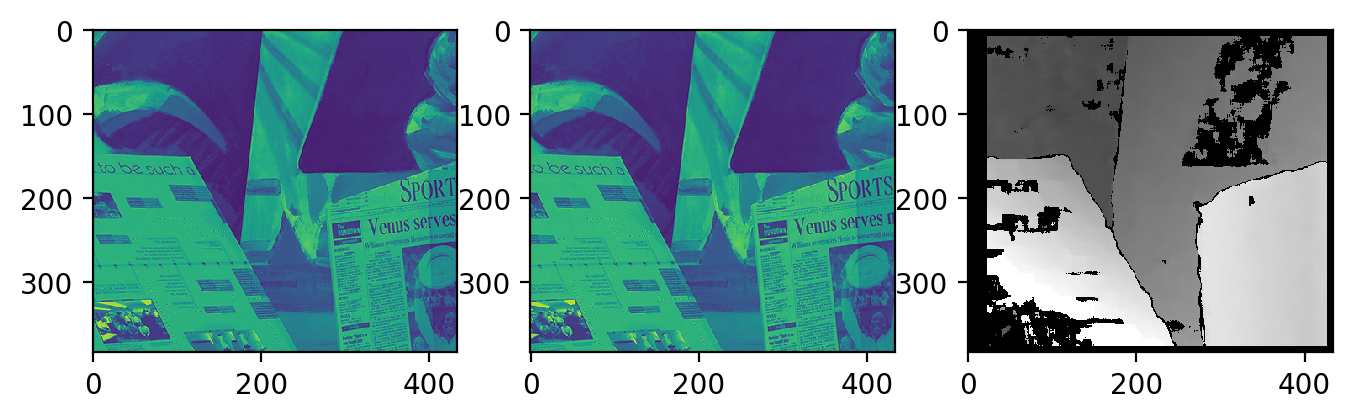



 80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

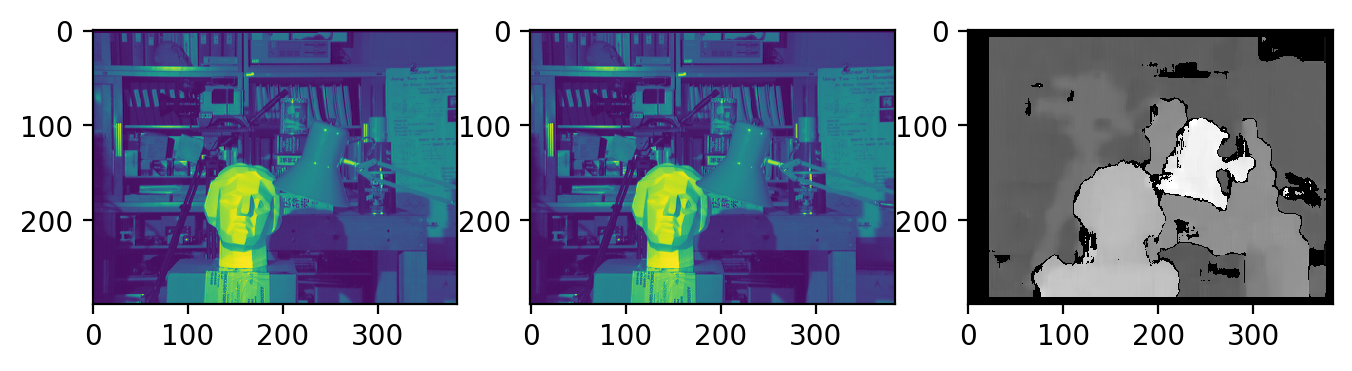



100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


In [114]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

mse_cv = []

for folders in tqdm(os.listdir(Data_path)):
    if(folders != ".DS_Store"):
        for filename in os.listdir(Data_path+"/"+folders):
            if (filename[0:5]=="view1"):
                
                imgL = cv.imread(Data_path+"/"+folders+'/'+filename,0)
                
                
            elif (filename[0:5]=="view5"):
    
                imgR = cv.imread(Data_path+"/"+folders+'/'+filename,0)
            
        plt.figure(figsize=(8,3), dpi=200)
        plt.subplot(131)
        plt.imshow(imgL)
        plt.subplot(132)
        plt.imshow(imgR)
        plt.subplot(133)
        
#         print(folders)
#         plt.imshow(imgL)
#         plt.show()
#         plt.imshow(imgR)
#         plt.show()


        stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
        disparity = stereo.compute(imgL,imgR)
        mse_cv.append(disparity)
        plt.imshow(disparity,'gray')
        plt.show()


#     plt.title('Depth')


In [91]:
a=np.array([[1/15,1,2],[1/15,1,2]])
np.count_nonzero(a <(1.25/15))

2

# Evaluation 

I am going to use 4 different evalusation matrix for comparing the results of 3 method:

    First : mean square error of the disparities(MDE)
    Second : median error relative to the rendered depth (Rel)
    Third : percentages of pixels with predicted depths falling within an interval ([δ = |predicted − true|/true]), δ = 1.25, 1.25^2, 1.25^3
    Forth : I am also compairing the time of each algorithem
    
Also, I have evaluated results for different iteration for the belief propagation algorithem and evaluated the above metric for different itteration.
 





  0%|          | 0/5 [00:00<?, ?it/s]

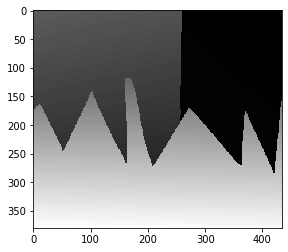





 20%|██        | 1/5 [00:00<00:01,  3.13it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


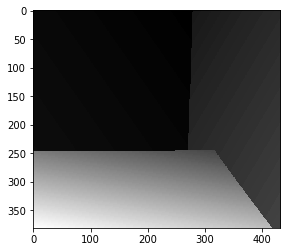





 40%|████      | 2/5 [00:00<00:00,  3.30it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


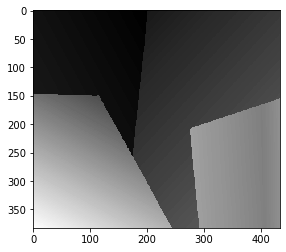





100%|██████████| 5/5 [00:00<00:00,  5.87it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [172]:
i=0
mse = []
mseCV =[]

mse_iter = []

med = []
medianCV =[]
median_iter = []


medf = []
msef =[]
f = [[],[],[]]


interval = [[],[],[]]
intervalCV =[[],[],[]]
interval_iter = [[],[],[]]


listssd = [temp[0],temp[2],temp[6],temp[8]]
listncc = [temp[1],temp[3],temp[7],temp[9]]

final =[]
for folders in tqdm(os.listdir(Data_path)):
    if(folders != ".DS_Store"):
        mse_iter_sub = []
        median_iter_sub = []
        in_iter_sub = [[],[],[]]
        for filename in os.listdir(Data_path+"/"+folders):
            if (filename[0:5]=="disp1"):
                
                
                disparity = imageio.imread(Data_path+"/"+folders+'/'+filename)
                plt.imshow(disparity,'gray')
                plt.show()
                
                # First : mean square error of the disparities(MDE) 
                
                mse.append((np.square(disparity/255 - MSE_list_algo[i]/15)).mean())
                mseCV.append((np.square(disparity/255 - mse_cv[i]/255)).mean())
                
                for j in MSE_list_iter[i]:
                    mse_iter_sub.append((np.square(disparity/255 - j/15)).mean())
                mse_iter.append(mse_iter_sub)
                
                
                
                # Second : median error relative to the rendered depth (Rel)
                med.append(np.median(np.square(disparity/255 - MSE_list_algo[i]/15)))
                medianCV.append(np.median(np.square(disparity/255 - mse_cv[i]/255)))
                
                for j in MSE_list_iter[i]:
                    median_iter_sub.append(np.median(np.square(disparity/255 - j/15)))
                median_iter.append(mse_iter_sub)
                
                #Third : percentages of pixels with predicted depths falling within an interval 
                #([δ = |predicted − true|/true]), δ = 1.25, 1.25^2, 1.25^3 
                
                a = np.square(disparity/255 - MSE_list_algo[i]/15)
                
                interval[0].append(np.count_nonzero(a<(1.25/15)))
                interval[1].append(np.count_nonzero(a<(1.25**2/15)))
                interval[2].append(np.count_nonzero(a<(1.25**3/15)))
                
                aCV = np.square(disparity/255 - mse_cv[i]/255)
                
                intervalCV[0].append(np.count_nonzero(aCV<(1.25/15)))
                intervalCV[1].append(np.count_nonzero(aCV<(1.25**2/15)))
                intervalCV[2].append(np.count_nonzero(aCV<(1.25**3/15)))


                
                for j in MSE_list_iter[i]:
                    aiter = np.median(np.square(disparity/255 - j/15))
                    print(np.count_nonzero(aiter<(1.25/15)))
                    in_iter_sub[0].append(np.count_nonzero(aiter<(1.25/15)))
                    in_iter_sub[1].append(np.count_nonzero(aiter<(1.25**2/15)))
                    in_iter_sub[2].append(np.count_nonzero(aiter<(1.25**3/15)))
                                      
                interval_iter[0].append(in_iter_sub[0])
                interval_iter[1].append(in_iter_sub[1])
                interval_iter[2].append(in_iter_sub[2])
                
                resized_image = cv2.resize(listssd[i], (disparity.shape[1],disparity.shape[0]))
                msef.append((np.square(disparity/255 - resized_image/255)).mean())
                medf.append(np.median(np.square(disparity/255 - resized_image/255)))
                
#                 for j in resized_image:
                aiter = np.square(disparity/255 - resized_image/15)
                f[0].append(np.count_nonzero(aiter<(1.25/15)))
                f[1].append(np.count_nonzero(aiter<(1.25**2/15)))
                f[2].append(np.count_nonzero(aiter<(1.25**3/15)))
                
                resized_image = cv2.resize(listncc[i], (disparity.shape[1],disparity.shape[0]))
                msef.append((np.square(disparity/255 - resized_image/255)).mean())
                medf.append(np.median(np.square(disparity/255 - resized_image/255)))
                
#                 for j in resized_image:
                aiter = np.square(disparity/255 - resized_image/15)
                f[0].append(np.count_nonzero(aiter<(1.25/15)))
                f[1].append(np.count_nonzero(aiter<(1.25**2/15)))
                f[2].append(np.count_nonzero(aiter<(1.25**3/15)))
                
                 
                
#                 af = np.square(disparity/255 - listssd[i]/255)
                
#                 intervalf[0].append(np.count_nonzero(af<(1.25/15)))
#                 intervalf[1].append(np.count_nonzero(af<(1.25**2/15)))
#                 intervalf[2].append(np.count_nonzero(af<(1.25**3/15)))
                
                
#                 print(np.amax(mse_cv[i]))
#                 plt.imshow(MSE_list_algo[i],'gray')
#                 plt.show()
        i=i+1
        
        

In [167]:
print(mse,mseCV,mse_iter)
print(med, medianCV,median_iter)
print(interval,intervalCV ,interval_iter )

print(msef,medf,intervalf)



[0.14424910119179332, 0.09057438721119075, 0.12905802841149736] [0.1393492374945251, 0.07897885840711463, 0.1082178836064262] [[0.13086053648464283, 0.13363072571483403, 0.1356226552540521, 0.13707925532475382, 0.1382845820508036, 0.13913263513734667, 0.13967334649829172, 0.14032626912744525, 0.1408514530550061, 0.14135947675118518, 0.14181354360712958, 0.14219829263973638, 0.14252723327088415, 0.14285255162686267, 0.14317113429479117, 0.14334559638296546, 0.14359082361930423, 0.14374271663457489, 0.1439592129671203, 0.14408542666708812], [0.1072314460470018, 0.09481797327789869, 0.09257761459611162, 0.09152154002118316, 0.09084532400025297, 0.09023340687489567, 0.08993787822253431, 0.08978150642725262, 0.08955245567626618, 0.08942961046043785, 0.08945060815271222, 0.0896017012073927, 0.08971543580187122, 0.0898791734291296, 0.08997476126328857, 0.09010026882802415, 0.09016871338118118, 0.09025920154939755, 0.0903155197371747, 0.09045719790205882], [0.12607103637163697, 0.1209663928690

In [173]:
# mse.append((np.square(disparity/255 - listssd[i]/255)).mean())

print(np.asarray(f).sum(axis =1))

[243989 264630 288394]
